# Libraries

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, log
from scipy.linalg import expm
import itertools
from math import cos, ceil
import time

In [ ]:
from IPython.display import clear_output

In [ ]:
#from Diff import *

In [ ]:
!git clone https://github.com/equadratures/equadratures
clear_output()

In [ ]:
# A bit different from Alessio's version
# Removed 'n' as argument and made it isotropic, otherwise more changes to make in the original code
new_code = '''
def hyperbolic_cross(orders):
    dimensions = len(orders)
    n = orders[0]
    I = np.arange(n+1)
    I = np.reshape(I, (1,-1))
    for k in range(2, dimensions+1):
        J = np.array([]).reshape((I.shape[0]+1, 0))
        for i in range(n+1):
            l = I.shape[1]
            for j in range(l):
                z = I[:,j]
                #z = np.reshape(z, (I.shape[0], 1))
                if (i+1)*np.prod(z+1) <= n+1:
                    z = np.row_stack((z.reshape((-1,1)), np.array([i]).reshape(1,1)))
                    J = np.hstack((J, z))
        I = J
    return I.T
'''

In [ ]:
with open("/content/equadratures/equadratures/basis.py", "a") as file:
  file.write(new_code)

In [ ]:
new_line_1 = '''        elif name == "hyperbolic-cross":
            basis = hyperbolic_cross(self.orders)
'''

# Open the file in read mode to read its contents
with open("/content/equadratures/equadratures/basis.py", 'r') as file:
    lines = file.readlines()

lines.insert(179, new_line_1)

# Open the file in write mode to overwrite its contents
with open("/content/equadratures/equadratures/basis.py", 'w') as file:
    file.writelines(lines)

new_line_2 = '''        elif name.lower() == "hyperbolic-cross":
            basis = hyperbolic_cross(self.orders)
'''

# Open the file in read mode to read its contents
with open("/content/equadratures/equadratures/basis.py", 'r') as file:
    lines = file.readlines()

lines.insert(93, new_line_2)

# Open the file in write mode to overwrite its contents
with open("/content/equadratures/equadratures/basis.py", 'w') as file:
    file.writelines(lines)

In [ ]:
with open("/content/equadratures/equadratures/optimisation.py", "r") as file:
    fix_1 = file.read()

# Lines to modify in equadratures/optimisation.py

fix_1 = fix_1.replace('objective = lambda x: k*np.asscalar(f(x))', 'objective = lambda x: k*f(x).item()')
fix_1 = fix_1.replace('constraint = lambda x: np.asscalar(g(x))', 'constraint = lambda x: g(x).item()')
fix_1 = fix_1.replace('self.f_old = np.asscalar(self.f[ind_min])', 'self.f_old = self.f[ind_min].item()')
fix_1 = fix_1.replace('return np.asscalar(f)', 'return f.item()')
fix_1 = fix_1.replace('np.asscalar(my_poly.get_polyfit(x))', 'my_poly.get_polyfit(x).item()')
fix_1 = fix_1.replace('np.asscalar(my_poly.get_polyfit(np.dot(x,self.U)))', 'my_poly.get_polyfit(np.dot(x,self.U)).item()')
fix_1 = fix_1.replace('del_m = np.asscalar(my_poly.get_polyfit(self.s_old)) - m_new', 'del_m = np.ndarray.item(my_poly.get_polyfit(self.s_old)) - m_new')
fix_1 = fix_1.replace('del_m = np.asscalar(my_poly.get_polyfit(np.dot(self.s_old,self.U))) - m_new', 'del_m = np.ndarray.item(my_poly.get_polyfit(np.dot(self.s_old,self.U))) - m_new')

with open("/content/equadratures/equadratures/optimisation.py", "w") as file:
    file.write(fix_1)

In [ ]:
with open("/content/equadratures/equadratures/sampling_methods/induced.py", "r") as file:
    fix_2 = file.read()

# Lines to modify in equadratures/sampling_methods/induced.py

fix_2 = fix_2.replace('F = np.asscalar(F)', 'F = F.item()')

with open("/content/equadratures/equadratures/sampling_methods/induced.py", "w") as file:
    file.write(fix_2)

In [ ]:
with open("/content/equadratures/equadratures/solver.py", "r") as file:
    fix_3 = file.read()

# Lines to modify in equadratures/solver.py

fix_3 = fix_3.replace('fe = 0.5*(np.asscalar(np.dot(r.T,r)) - epsilon**2)', 'fe = 0.5*(np.dot(r.T,r).item() - epsilon**2)')
fix_3 = fix_3.replace('cqe = np.asscalar(np.dot(r.T,r)) - epsilon**2', 'cqe = np.dot(r.T,r).item() - epsilon**2')

with open("/content/equadratures/equadratures/solver.py", "w") as file:
    file.write(fix_3)

In [ ]:
with open("/content/equadratures/equadratures/subspaces.py", "r") as file:
    fix_4 = file.read()

# Lines to modify in equadratures/subspaces.py

fix_4 = fix_4.replace('dV[:,l,:,j] = np.asscalar(vectord[l])*(X.T*current[:,j])', 'dV[:,l,:,j] = vectord[l].item()*(X.T*current[:,j])')

with open("/content/equadratures/equadratures/subspaces.py", "w") as file:
    file.write(fix_4)

In [ ]:
import sys
sys.path.append('/content/equadratures')

import equadratures as eq

In [ ]:
import cvxpy as cp
!pip install mosek
clear_output()
import mosek

# Functions

In [ ]:
'''
def ed_diff_function(y):
  y = (y+1)/2
  c_bar = construct_cbar(y)

  C = construct_C(c_bar, sizes, n)
  D = construct_D(A, C, n)
  M = C*A - D

  diff = ed_diffusion(M, x0, tau=0.01, T=1)

  return diff[2,-1]
'''

In [ ]:
'''
def ted_diff_function(y):
  y = (y+1)/2
  c_bar = construct_cbar(y)

  C = construct_C(c_bar, sizes, n)
  M_t = construct_Mt(A, C, sizes, alpha=[2,3,4])

  diff = RK4_t(x0, 0.01, M_t)

  return diff[2,-1]
'''

In [ ]:
def get_average_rmse(m, my_method, dim=3, simuls=5, basis='total-order', ord=4):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for _ in range(dim)]

  for j in range(simuls):
    if basis == 'hyperbolic-cross':
      my_basis = eq.Basis(basis, orders=[ord for _ in range(dim)])
    else:
      my_basis = eq.Basis(basis)

    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ed_diff_function)
    my_poly = eq.Poly(parameters=my_param_list, basis=my_basis, method=my_method, \
                      sampling_args={'mesh':'user-defined', 'sample-points':X_train, \
                                    'sample-outputs':y_train})
    my_poly.set_model()

    test_pts = np.random.uniform(-1, 1, size=(1000, dim))
    test_evals = eq.evaluate_model(test_pts, ed_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    errors = np.append(errors, test_r2)

  return np.mean(errors)

In [ ]:
def get_average_rmse_TED(m, my_method, dim=3, simuls=5, basis='total-order', ord=4):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for _ in range(dim)]

  for j in range(simuls):
    if basis == 'hyperbolic-cross':
      my_basis = eq.Basis(basis, orders=[ord for _ in range(dim)])
    else:
      my_basis = eq.Basis(basis)
    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ted_diff_function)
    my_poly = eq.Poly(parameters=my_param_list, basis=my_basis, method=my_method, \
                      sampling_args={'mesh':'user-defined', 'sample-points':X_train, \
                                    'sample-outputs':y_train})
    my_poly.set_model()

    test_pts = np.random.uniform(-1, 1, size=(500, dim))
    test_evals = eq.evaluate_model(test_pts, ted_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    errors = np.append(errors, test_r2)

  return np.mean(errors)

In [ ]:
def conv(x, method, dim=3, simuls=5, basis='total-order', ord=4, verbose=False):
  Y = []

  for element in x:
    if verbose:
      start = time.time()
    Y.append(get_average_rmse(element, method, dim=dim, simuls=simuls, ord=ord, basis=basis))
    if verbose:
      end = time.time()
      print('m={} w/ {}, done: {} seconds.'.format(element, method, end-start))

  return Y

In [ ]:
def conv_TED(x, method, dim=3, simuls=5, basis='total-order', ord=4, verbose=False):
  Y = []

  for element in x:
    if verbose:
      start = time.time()
    Y.append(get_average_rmse_TED(element, method, dim=dim, simuls=simuls, ord=ord, basis=basis))
    if verbose:
      end = time.time()
      print('m={} w/ {}, done: {} seconds.'.format(element, method, end-start))

  return Y

# Testing equadratures...

## Figures 5.5 and 5.6

In [ ]:
d = 2

In [ ]:
def ed_diff_function(y):
  return exp(-1/(2*d) * np.sum(y))

In [ ]:
s_HC = [eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(d)]).get_cardinality() for i in range(2,36,2)]
ords = [i for i in range(2,36,2)]

In [ ]:
s_HC

[5, 10, 16, 23, 29, 37, 45, 52, 60, 70, 76, 87, 95, 103, 113, 123, 131]

In [ ]:
multiplier = [1, 1.5, 2] if d==2 else [1, 1.25, 1.5, 2]
label = ['m=s', 'm=1.5s', 'm=2s', 'm=slog(s)', 'm=0.5s^2'] if d==2 else ['m=s', 'm=1.25s', 'm=1.5s', 'm=2s', 'm=slog(s)']

In [ ]:
Y = []

for a in multiplier:
  y = []
  for s in s_HC:
    y.append(get_average_rmse(int(a*s), 'least-squares', dim=d, basis='hyperbolic-cross', ord=ords[s_HC.index(s)]))
  Y.append(y)

In [ ]:
y_log = []
for s in s_HC:
  y_log.append(get_average_rmse(int(s*log(s)), 'least-squares', dim=d, basis='hyperbolic-cross', ord=ords[s_HC.index(s)]))
Y.append(y_log)

In [ ]:
y_sq = []
for s in s_HC:
  y_sq.append(get_average_rmse(int(0.5 * s**2), 'least-squares', dim=d, basis='hyperbolic-cross', ord=ords[s_HC.index(s)]))
Y.append(y_sq)

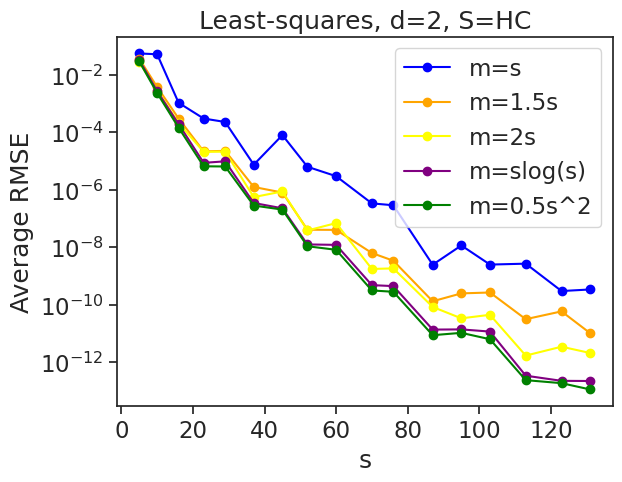

In [ ]:
color = ['blue', 'orange', 'yellow', 'purple', 'green']
#label = ['m=s', 'm=1.25s', 'm=1.5s', 'm=2s', 'm=slog(s)']
for i in range(len(Y)):
  plt.plot(s_HC, Y[i], color[i], label=label[i], marker='o')
  plt.xlabel('s')
  plt.ylabel('Average RMSE')
  plt.yscale('log')
  plt.title('Least-squares, d={}, S=HC'.format(d))
plt.legend()
plt.show()

## Figure 7.2

In [ ]:
d = 4

def ed_diff_function(y):
  return exp(-1/(2*d) * np.sum(y))

nb_samples = [10*i for i in range(1,26)]
order = 43

In [ ]:
d = 8

def ed_diff_function(y):
  num = np.prod(np.array([cos(16*y[i]/2**i) for i in range(ceil(d/2)+1, d)]))
  dem = np.prod(np.array([1 - y[i]/4**i for i in range(ceil(d/2)+1, d)]))
  return num/dem

nb_samples = [20*i for i in range(1,26)]
order = 22

In [ ]:
d = 16

def ed_diff_function(y):
  return exp(-2/d * sum([(y[i] - ((-1)**i/(i+1)))**2 for i in range(d)]))

nb_samples = [50*i for i in range(2,21)]
order = 14

In [ ]:
eq.basis.Basis('hyperbolic-cross', orders=[order for _ in range(d)]).get_cardinality()

1843

In [ ]:
y_1 = conv(nb_samples, 'compressed-sensing', dim=d, simuls=1, basis='hyperbolic-cross', ord=order)
y_2 = conv(nb_samples, 'elastic-net', dim=d, simuls=1, basis='hyperbolic-cross', ord=order)

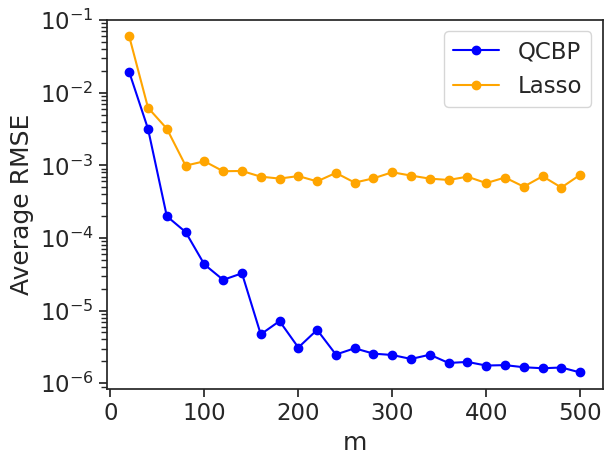

In [ ]:
plt.plot(nb_samples, y_1, 'blue', label='QCBP', marker='o')
plt.plot(nb_samples, y_2, 'orange', label='Lasso', marker='o')
plt.xlabel('m')
plt.ylabel('Average RMSE')
plt.yscale('log')
#plt.title('Least-squares, d={}, S=HC'.format(d))
plt.legend()
plt.show()

## Is 'sparse-grid' the same as HC?

In [ ]:
basis_1 = eq.Basis('sparse-grid', growth_rule='linear', orders=[4,4], level=3)
basis_2 = eq.Basis('sparse-grid', growth_rule='exponential', orders=[4,4], level=3)
basis_3 = eq.Basis('hyperbolic-basis', orders=[4,4], q=0.5)

In [ ]:
B = [basis_1, basis_2, basis_3]
fig, axs = plt.subplots(1, 3)
for ax in axs:
  B[axs.index(ax)].plot_index_set()

In [ ]:
basis = eq.Basis('hyperbolic-cross', orders=[4,4,4])

In [ ]:
basis.get_elements()

array([[0., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
print([eq.Basis('hyperbolic-cross', orders=[i,i,i]).get_cardinality() for i in range(4,20)])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


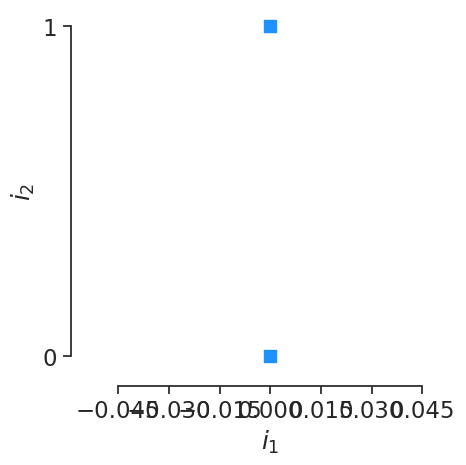

In [ ]:
basis.plot_index_set()

Doesn't look like a HC...

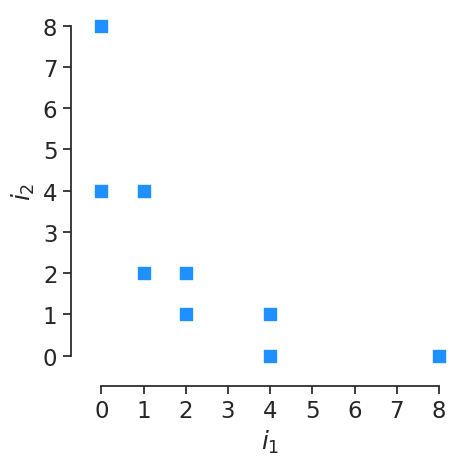

In [ ]:
basis_2.plot_index_set()

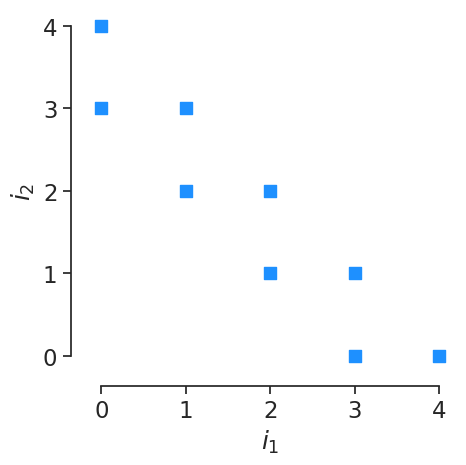

In [ ]:
eq.Basis('sparse-grid', growth_rule='linear', orders=[20,20], level=3).plot_index_set()

In [ ]:
d = 2

In [ ]:
def ed_diff_function(y):
  return exp(-1/(2*d) * np.sum(y))

In [ ]:
def get_average_rmse_sparse(m, my_method, dim=3, simuls=5, ord=4):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for i in range(dim)]
  my_basis = eq.Basis('sparse-grid', growth_rule='exponential', level=3)

  for j in range(simuls):
    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ed_diff_function)
    my_poly = eq.Poly(parameters=my_param_list, basis=my_basis, method=my_method, \
                      sampling_args={'mesh':'user-defined', 'sample-points':X_train, \
                                    'sample-outputs':y_train})
    my_poly.set_model()

    test_pts = np.random.uniform(-1, 1, size=(1000, dim))
    test_evals = eq.evaluate_model(test_pts, ed_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    errors = np.append(errors, test_r2)

  return np.mean(errors)

In [ ]:
s_SG = [eq.basis.Basis('sparse-grid', orders=[j for i in range(d)], growth_rule='exponential', level=3).get_cardinality() for j in range(1,17)]

In [ ]:
s_SG

[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]

In [ ]:
Y = []

for a in [1, 1.5, 2]:
  y = []
  for s in s_SG:
    y.append(get_average_rmse_sparse(int(a*s), 'least-squares', dim=d, ord=s_SG.index(s)))
  Y.append(y)

## Custom solvers (testing LS solver from scipy)

In [ ]:
from scipy.linalg import lstsq

In [ ]:
def scipy_ls(A, b, **kwargs):
  x, _, _, _ = lstsq(A, b, lapack_driver='gelss')
  return x

In [ ]:
def get_average_custom(m, dim=3, simuls=5, basis='total-order', ord=4):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for i in range(dim)]

  for j in range(simuls):
    if basis == 'hyperbolic-cross':
      my_basis = eq.Basis(basis, orders=[ord for _ in range(dim)])
    else:
      my_basis = eq.Basis(basis)

    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ed_diff_function)
    my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
            sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
              solver_args={'solve':scipy_ls,'verbose':False})
    my_poly.set_model()

    test_pts = np.random.uniform(-1, 1, size=(1000, dim))
    test_evals = eq.evaluate_model(test_pts, ed_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    errors = np.append(errors, test_r2)

  return np.mean(errors)

In [ ]:
d = 8

In [ ]:
def ed_diff_function(y):
  return exp(-1/(2*d) * np.sum(y))

In [ ]:
s_TD = [eq.basis.Basis('total-order', orders=[j for i in range(d)]).get_cardinality() for j in range(1,6)]

In [ ]:
s_TD

[9, 45, 165, 495, 1287]

In [ ]:
Y = []

for a in [1, 1.25, 1.5, 2]:
  y = []
  for s in s_TD:
    y.append(get_average_custom(int(a*s), dim=d, ord=s_TD.index(s)))
  Y.append(y)

In [ ]:
y_log = []
for s in s_TD:
  y_log.append(get_average_custom(int(s*log(s)), dim=d, ord=s_TD.index(s)))
Y.append(y_log)

In [ ]:
y_sq = []
for s in s_TD:
  y_sq.append(get_average_custom(int(0.5 * s**2), 'least-squares', dim=d, ord=s_TD.index(s)))
Y.append(y_sq)

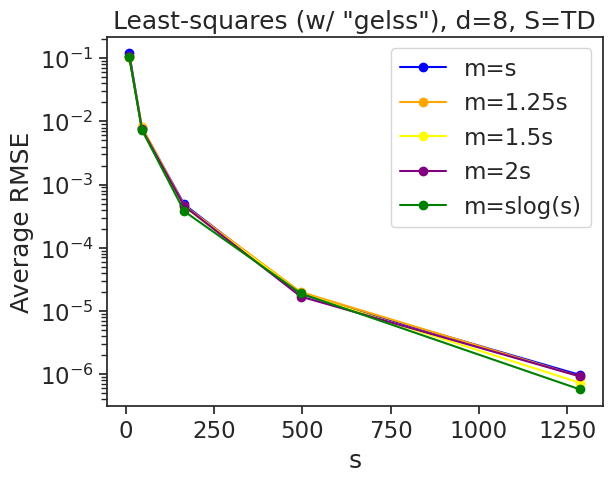

In [ ]:
color = ['blue', 'orange', 'yellow', 'purple', 'green']
label = ['m=s', 'm=1.25s','m=1.5s', 'm=2s', 'm=slog(s)']
for i in range(len(Y)):
  plt.plot(s_TD, Y[i], color[i], label=label[i], marker='o')
  plt.xlabel('s')
  plt.ylabel('Average RMSE')
  plt.yscale('log')
  plt.title('Least-squares (w/ "gelss"), d={}, S=TD'.format(d))
plt.legend()
plt.show()

## Custom solver w/ cvxpy

In [ ]:
## Example code from cvxpy documentation
## https://www.cvxpy.org/

'''
# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)
'''

def qcbp(A, b, eta=10e-5, **kwargs):
  n = A.shape[1]
  z = cp.Variable(n)
  b = np.reshape(b, (b.shape[0],))  # to avoid shape issues when defining the constraint
  objective = cp.Minimize(cp.norm1(z))
  constraints = [cp.norm2(A@z-b) <= eta]
  prob = cp.Problem(objective, constraints)
  result = prob.solve()  # MOSEK not working (install problem)

  return z.value #.reshape((n,1))

In [ ]:
def lasso():
  pass

In [ ]:
A = np.random.randn(15,15)
b = np.random.randn(15)

qcbp(A, b, 1).shape

(15,)

In [ ]:
def get_average_custom(m, dim=3, simuls=5, basis='total-order', ord=4, solv=qcbp):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for i in range(dim)]

  for j in range(simuls):
    if basis == 'hyperbolic-cross':
      my_basis = eq.Basis(basis, orders=[ord for _ in range(dim)])
    else:
      my_basis = eq.Basis(basis)

    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ed_diff_function)
    my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
            sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
              solver_args={'solve':solv,'verbose':False})
    my_poly.set_model()

    test_pts = np.random.uniform(-1, 1, size=(1000, dim))
    test_evals = eq.evaluate_model(test_pts, ed_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    errors = np.append(errors, test_r2)

  return np.mean(errors)

In [ ]:
get_average_custom(100, dim=d, simuls=1, basis='hyperbolic-cross')

0.49151223499452257

In [ ]:
def conv_custom(x, dim=3, simuls=5, basis='total-order', ord=4, method=qcbp, verbose=False):
  Y = []

  for element in x:
    if verbose:
      start = time.time()
    Y.append(get_average_custom(element, dim=dim, simuls=simuls, ord=ord, basis=basis, solv=method))
    if verbose:
      end = time.time()
      print('m={} w/ {}, done: {} seconds.'.format(element, str(method), end-start))

  return Y

In [ ]:
d = 4

def ed_diff_function(y):
  return exp(-1/(2*d) * np.sum(y))

nb_samples = [10*i for i in range(1,26)]
order = 43

In [ ]:
y_1 = conv_custom(nb_samples, dim=d, simuls=1, basis='hyperbolic-cross', ord=order)

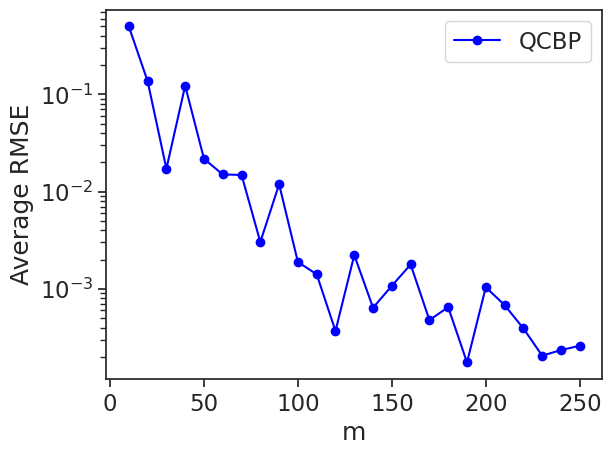

In [ ]:
plt.plot(nb_samples, y_1, 'blue', label='QCBP', marker='o')
#plt.plot(nb_samples, y_2, 'orange', label='Lasso', marker='o')
plt.xlabel('m')
plt.ylabel('Average RMSE')
plt.yscale('log')
#plt.title('Least-squares, d={}, S=HC'.format(d))
plt.legend()
plt.show()